In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import torch

from random import randint

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.state import State
from src.world import World

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Init 
----

In [6]:
config = Config()
world = World.create_from_config(config=config)
state = State.create_from(
    config=config,
    id="earth",
    x=randint(config.world_min_x, config.world_max_x),
    y=randint(config.world_min_y, config.world_max_y),
)
agent = Agent.create_from(id="earth", state=state)

# Draw agent action history
----

In [12]:
for step in range(10):
    action_idx = randint(0, len(config.possible_actions))
    agent.take_action(action=Action.create_from(config=config, action_idx=action_idx))

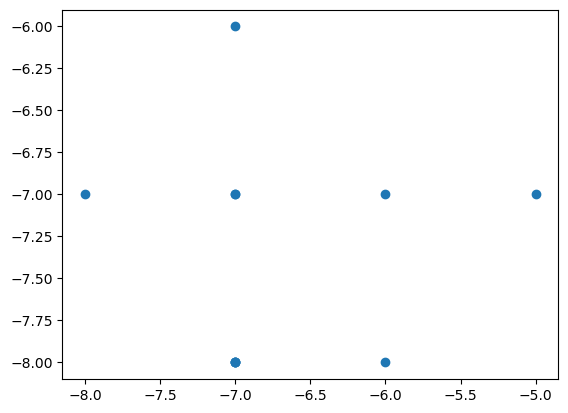

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
world.viz(ax=ax, agent=agent)
plt.show()

In [10]:
type(ax)

matplotlib.axes._axes.Axes